### Set up Data and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")

In [2]:
#Define df as our Dataset and set date as our index for the Dataset
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')

#Define X and y, with X holding the Features and y the correspoding Count of pedestrians
#Features with PCA k=0.999 (PC1 - PC48)
X = df[df.columns[55:103]]

# The targetvariable we try to predict is the pedestrian count
y = df["pedestrians count"]

In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets as numpy arryas (for our Neural Network)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)


from sklearn.preprocessing import StandardScaler
#Normalize the Data
# Scale the inputs to standardize the values of the Features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

### Visualize the Data 

### Baseline Model with Tensorflow

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
#Define Neural Network model

#Create a Keras Sequential class to hold the different layers of our Neural Network
model = keras.Sequential()

model.add(keras.Input(shape=X.shape[1])) #Add a Input layer and define the Input shape of it (which is the column lenght of the feature Dataset X)
model.add(layers.Dense(100, activation="relu")) #Add a Hidden layer with 500 Neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a second Hidden layer with 250 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(10, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(1, activation="relu")) # Add a output layer with 1 Neuron because we only have one output --> predicted pedestrian count

model.summary()#Display an overview of the Model


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4900      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                              

2022-11-24 19:40:57.947909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-24 19:40:57.948021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
#Specify the training configuration for the Neural Network
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Optimizer that minimizes our loss function (f.e SGD or Adam) with a learning rate of 0.001
    loss=keras.losses.mae,  # Loss function to minimize --> Mean absolute error 
    metrics=["mae", "mse"], # List of metrics to monitor
)

#Mehrere callbacks einfügen mit learning rate von keras callbacks --> webseite
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae', factor=0.2,
                              patience=5, min_lr=0.00001)
callbacks_list = [stop_early,reduce_lr]



history = model.fit(
    Xtrain, # Fit the model on the train data 
    ytrain, #Fit the model on the train data 
    #batch_size=64,
    epochs=200, # 1 epoch is one training iteration - for each epoch the Neural Network processes the entire training data 
    callbacks = callbacks_list, #Stop training when training is no longer improving Mean absolute error of the validation data (20% of the training data) within 3 epochs (metrics)
    validation_split=0.2, #Reserve 20% of the training data for validation at the end of each epoch 
)

Epoch 1/200


2022-11-24 19:40:58.190222: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-24 19:40:58.475019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 913.4166 - mae: 913.4166 - mse: 3096986.7500

2022-11-24 19:41:01.599479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 4s 14ms/step - loss: 913.4166 - mae: 913.4166 - mse: 3096986.7500 - val_loss: 614.3856 - val_mae: 614.3856 - val_mse: 1364539.8750 - lr: 0.0100
Epoch 2/200
269/269 [==============================] - 3s 10ms/step - loss: 560.7083 - mae: 560.7083 - mse: 1258910.2500 - val_loss: 479.0879 - val_mae: 479.0879 - val_mse: 970311.1250 - lr: 0.0100
Epoch 3/200
269/269 [==============================] - 3s 10ms/step - loss: 476.3139 - mae: 476.3139 - mse: 995253.5000 - val_loss: 483.4181 - val_mae: 483.4181 - val_mse: 994580.8125 - lr: 0.0100
Epoch 4/200
269/269 [==============================] - 3s 10ms/step - loss: 445.9877 - mae: 445.9877 - mse: 905016.0000 - val_loss: 452.3627 - val_mae: 452.3627 - val_mse: 944245.8750 - lr: 0.0100
Epoch 5/200
269/269 [==============================] - 3s 10ms/step - loss: 419.3424 - mae: 419.3424 - mse: 830573.7500 - val_loss: 394.3288 - val_mae: 394.3288 - val_mse: 773054.4375 - lr: 0.0100
Epoch 6/200
269/269 [===

### Model evaluation

In [7]:
# Evaluate the model on the test data using `evaluate` result is the corresponding MAE
print("Evaluate on test data")
results = model.evaluate(Xtest, ytest)
results_train = model.evaluate(Xtrain, ytrain)
print("test loss, test mae, test mse:", results)
print("train loss, train mae, train mse:", results_train)

Evaluate on test data
336/336 [==============================] - 2s 5ms/step - loss: 299.1216 - mae: 299.1216 - mse: 521513.8750
test loss, test mae, test mse: [326.66265869140625, 326.66265869140625, 516144.84375]
train loss, train mae, train mse: [299.1216125488281, 299.1216125488281, 521513.875]


In [8]:
#Create a function that evaluates the model and saves the results in a dataframe 
def evaluate_model(model, Xtest, ytest):
    eval_dict = model.evaluate(Xtest, ytest, return_dict=True)
    
    display_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    
    return display_df

# Evaluate basemodel on test set and add results to dataframe
results_comparisson = evaluate_model(model, Xtest, ytest)

# Set index to 'Baseline'
results_comparisson.index = ['Startwerte']

# Display results
results_comparisson.head()

144/144 [==============================] - 1s 5ms/step - loss: 326.6627 - mae: 326.6627 - mse: 516144.8438


,loss,mae,mse
Startwerte,326.662659,326.662659,516144.84375


### Visualize the Model performance

 68/144 [=============>................] - ETA: 0s

2022-11-24 19:42:21.933148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 0s 2ms/step


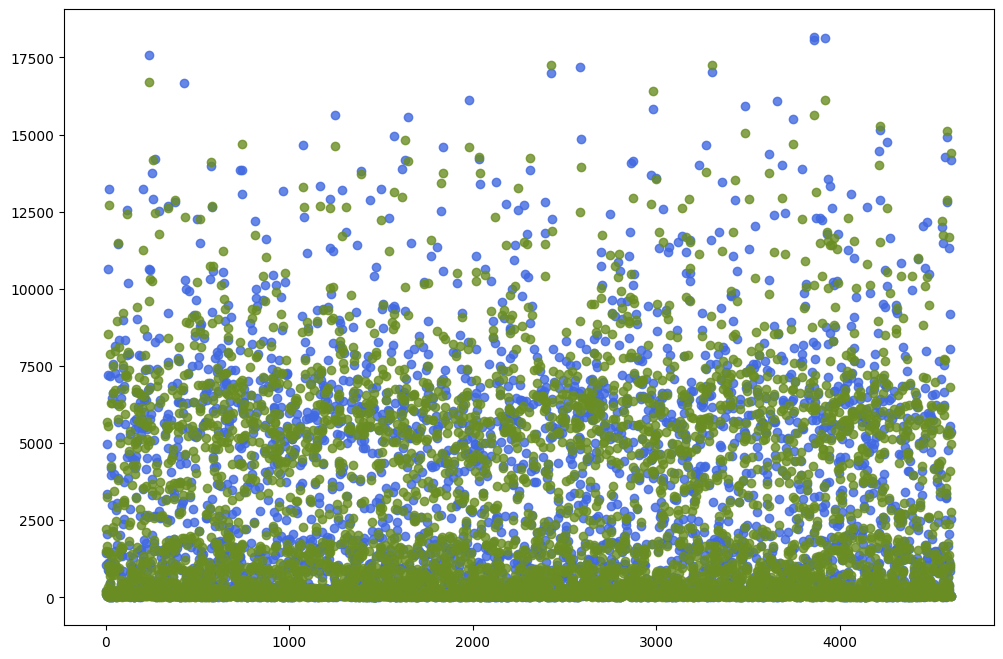

In [9]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

#Using the Neural Network to predict the Pedestrian count for our Xtest set in order to plot it against the actual values
ypred = model.predict(Xtest)


fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(xs, ytest, color ='royalblue', alpha=0.8)

plt.scatter(xs, ypred, color ='olivedrab', alpha=0.8)

plt.show()

144/144 [==============================] - 1s 5ms/step - loss: 326.6627 - mae: 326.6627 - mse: 516144.8438


Text(112.72222222222221, 0.5, 'MAE')

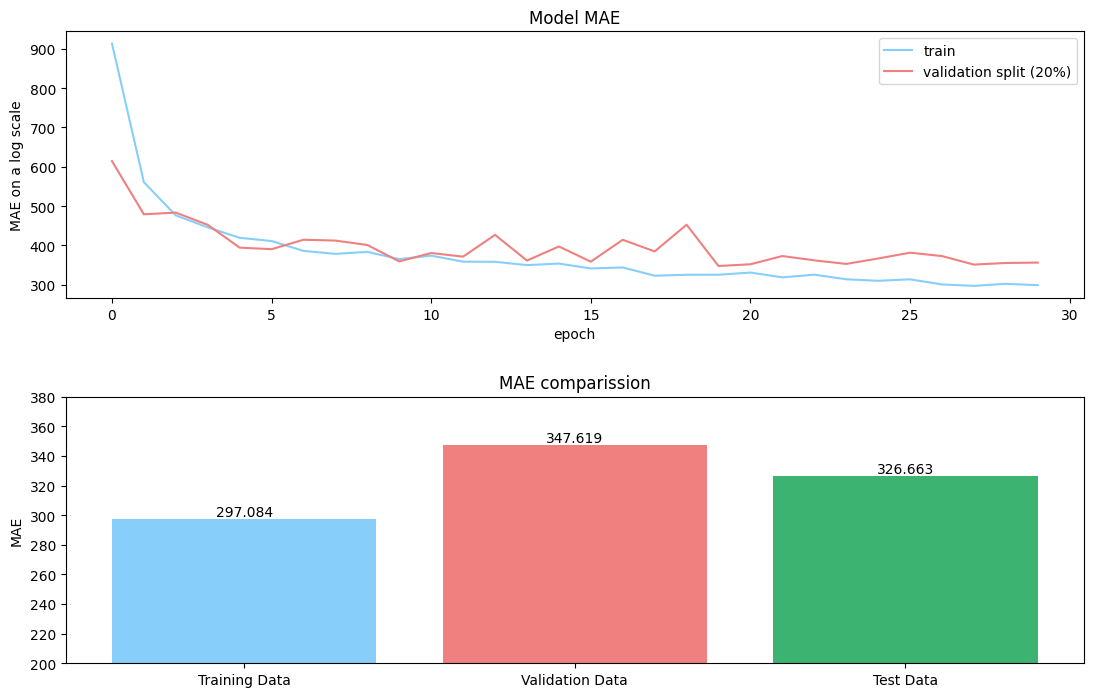

In [10]:
#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(2, figsize=(12, 8))

fig.tight_layout(pad=5.0)

axs[0].plot(history.history['mae'], label="train", color="lightskyblue")
axs[0].plot(history.history['val_mae'], label="validation split (20%)", color="lightcoral")
axs[0].set_title('Model MAE')
axs[0].set_ylabel('MAE on a log scale')
axs[0].set_xlabel('epoch')
axs[0].legend(loc='upper right')
#axs[0].set_yscale("log")

f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)

axs[1].bar("Training Data",min(f_mae), color="lightskyblue") #Display minimum mae of the training data set
axs[1].bar("Validation Data", min(f_val_mae), color="lightcoral")#Display minimum mae of the validation data set
axs[1].bar("Test Data", f_test_mae[0], color="mediumseagreen")#Display mae of the test data set
axs[1].bar_label(axs[1].containers[0], label_type='edge')
axs[1].bar_label(axs[1].containers[1], label_type='edge')
axs[1].bar_label(axs[1].containers[2], label_type='edge')
axs[1].set_ylim([200, 380])
axs[1].set_title('MAE comparission')
axs[1].set_ylabel('MAE')


144/144 [==============================] - 1s 5ms/step - loss: 326.6627 - mae: 326.6627 - mse: 516144.8438


([<matplotlib.axis.XTick at 0x2824a77f0>,
 [Text(0.2, 0, 'Training Data'),
  Text(1.2, 0, 'Validation Data'),
  Text(2.2, 0, 'Test Data')])

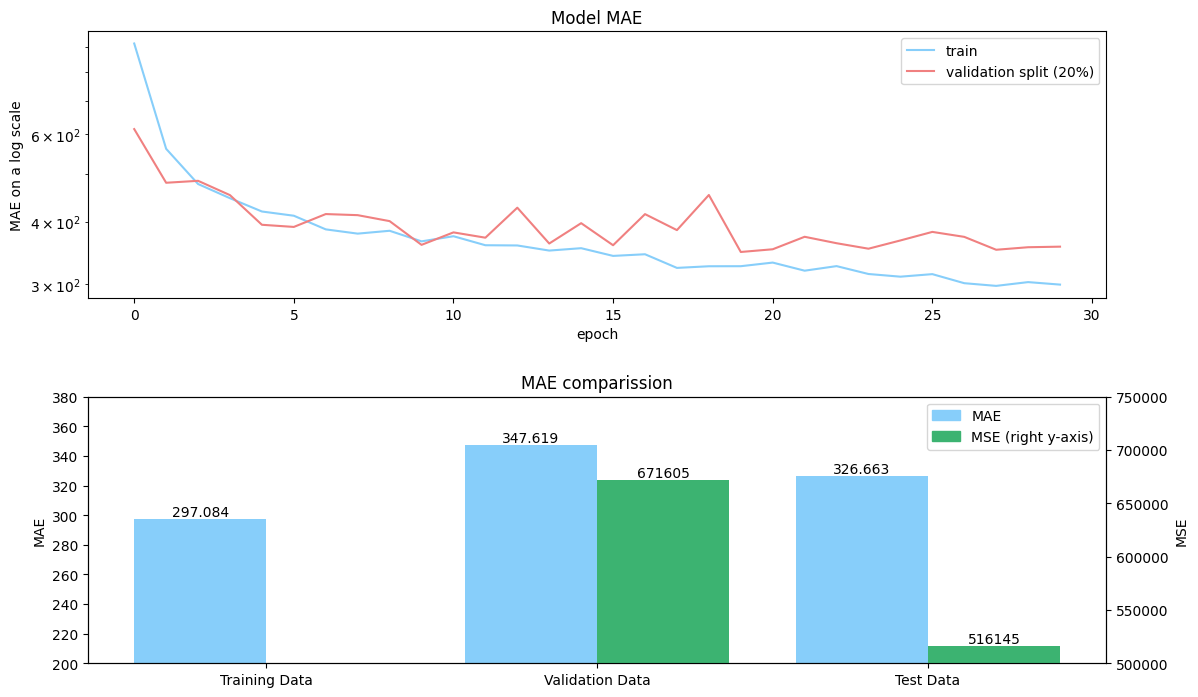

In [11]:
import matplotlib.patches as mpatches

#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(2, figsize=(12, 8))

fig.tight_layout(pad=5.0)

axs[0].plot(history.history['mae'], label="train", color="lightskyblue")
axs[0].plot(history.history['val_mae'], label="validation split (20%)", color="lightcoral")
axs[0].set_title('Model MAE')
axs[0].set_ylabel('MAE on a log scale')
axs[0].set_xlabel('epoch')
axs[0].legend(loc='upper right')
axs[0].set_yscale("log")

f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)


axs4 = axs[1].twinx()

x_axis = np.arange(3)

nameofdata = ["Training Data","Validation Data","Test Data"]

f_mse = history.history["mse"]
f_val_mse = history.history["val_mse"]


axs[1].bar(x_axis[0],min(f_mae), color="lightskyblue", width=0.4) #Display minimum mae of the training data set
axs[1].bar(x_axis[1], min(f_val_mae), color="lightskyblue", width=0.4)#Display minimum mae of the validation data set
axs[1].bar(x_axis[2], f_test_mae[0], color="lightskyblue", width=0.4)#Display mae of the test data set

axs[1].bar_label(axs[1].containers[0], label_type='edge')
axs[1].bar_label(axs[1].containers[1], label_type='edge')
axs[1].bar_label(axs[1].containers[2], label_type='edge')

axs[1].set_ylim([200, 380])
axs[1].set_title('MAE comparission')
axs[1].set_ylabel('MAE')


axs4.bar(x_axis[0] +0.4, min(f_mse), color="mediumseagreen", width=0.4)
axs4.bar(x_axis[1]+0.4, min(f_val_mse), color="mediumseagreen", width=0.4,)
axs4.bar(x_axis[2]+0.4, f_test_mae[2], color="mediumseagreen", width=0.4,)
axs4.set_ylabel('MSE')

axs4.bar_label(axs4.containers[0], label_type='edge')
axs4.bar_label(axs4.containers[1], label_type='edge')
axs4.bar_label(axs4.containers[2], label_type='edge')
axs4.set_ylim([500000, 750000])




#Custom Legend
leg_mae = mpatches.Patch(color='lightskyblue', label='MAE')
leg_mse = mpatches.Patch(color='mediumseagreen', label='MSE (right y-axis)')

axs[1].legend(handles=[leg_mae, leg_mse])

plt.xticks(x_axis + 0.2,nameofdata)

### Hyperparamter tuning 

In [12]:
import keras_tuner as kt

In [13]:
def model_builder(hp): #ADAGRAD BENUTZEN ALS OPTIMZER und LEARNING RATE DECREASE implementieren
 
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    # Tune the number of hidden layers and units in each aswell as the best activation function.
    # Number of hidden layers: 1 - 8
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 7)):
        
        hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
        
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation=hp_activation)
            )
        
      
    # Add output layer.
    model.add(keras.layers.Dense(units=1, activation="relu"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.mae,
                  metrics=["mae"])
    
    return model


### Test Model

In [14]:
def model_builder(hp): #ADAGRAD BENUTZEN ALS OPTIMZER und LEARNING RATE DECREASE implementieren
 
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    # Tune the number of hidden layers and units in each aswell as the best activation function.
    # Number of hidden layers: 1 - 8
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 7)):
        
       #hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
        
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=128, step=32),
                activation="relu")
            )
        
      
    # Add output layer.
    model.add(keras.layers.Dense(units=1, activation="relu"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    #hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss=keras.losses.mae,
                  metrics=["mae"])
    
    return model

In [15]:
# def model_builder(hp): #ADAGRAD BENUTZEN ALS OPTIMZER und LEARNING RATE DECREASE implementieren
 
#     # Initialize sequential API and start building model.
#     model = keras.Sequential()
#     model.add(keras.layers.Flatten())
    
#     # Tune the number of hidden layers and units in each aswell as the best activation function.
#     # Number of hidden layers: 1 - 8
#     # Number of Units: 32 - 512 with stepsize of 32
#     for i in range(1, hp.Int("num_layers", 8, 12)):
        
#        #hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
        
#         model.add(
#             keras.layers.Dense(
#                 units=128,
#                 activation="relu")
#             )
        
      
#     # Add output layer.
#     model.add(keras.layers.Dense(units=1, activation="relu"))
#     #hp_learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
#     #hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
#     # Define optimizer, loss, and metrics
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
#                   loss=keras.losses.mae,
#                   metrics=["mae"])
    
#     return model

In [16]:
# Create a tuner 
tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=20,
                     factor=3,
                     hyperband_iterations=15,
                     overwrite=True,
                     directory='kt_dir',
                     project_name='kt_hyperband')

# Create a stop early function if val_mae doesn't improve over 3 epochs

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae', factor=0.2,
                              patience=4, min_lr=0.00001)
callbacks_list = [stop_early,reduce_lr]

In [17]:
# Execute the tuner  
tuner.search(Xtrain, ytrain, epochs=50, validation_split=0.2, callbacks=callbacks_list)

Trial 176 Complete [00h 00m 54s]
val_mae: 368.6904296875

Best val_mae So Far: 320.4083251953125
Total elapsed time: 01h 29m 30s

Search: Running Trial #177

Value             |Best Value So Far |Hyperparameter
5                 |7                 |num_layers
128               |96                |units_1
128               |64                |units_2
64                |64                |units_3
64                |96                |units_4
96                |64                |units_5
96                |64                |units_6
20                |20                |tuner/epochs
0                 |0                 |tuner/initial_epoch
0                 |0                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/20


2022-11-24 21:11:57.018293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 886.4659 - mae: 886.4659

2022-11-24 21:12:03.089951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 9s 18ms/step - loss: 886.4659 - mae: 886.4659 - val_loss: 605.4437 - val_mae: 605.4437 - lr: 0.0100
Epoch 2/20
269/269 [==============================] - 5s 20ms/step - loss: 537.7267 - mae: 537.7267 - val_loss: 453.6301 - val_mae: 453.6301 - lr: 0.0100
Epoch 3/20
269/269 [==============================] - 5s 19ms/step - loss: 474.9771 - mae: 474.9771 - val_loss: 454.0367 - val_mae: 454.0367 - lr: 0.0100
Epoch 4/20
269/269 [==============================] - 3s 12ms/step - loss: 427.1385 - mae: 427.1385 - val_loss: 401.2473 - val_mae: 401.2473 - lr: 0.0100
Epoch 5/20
269/269 [==============================] - 3s 12ms/step - loss: 417.5231 - mae: 417.5231 - val_loss: 390.7892 - val_mae: 390.7892 - lr: 0.0100
Epoch 6/20
269/269 [==============================] - ETA: 0s - loss: 414.3095 - mae: 414.3095

In [ ]:
tuner.results_summary()

Results summary
Results in kt_dir/kt_hyperband
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 11
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 432.3564758300781
Trial summary
Hyperparameters:
num_layers: 9
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 434.75262451171875
Trial summary
Hyperparameters:
num_layers: 8
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 447.8500061035156
Trial summary
Hyperparameters:
num_layers: 12
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 492.190185546875
Trial summary
Hyperparameters:
num_layers: 10
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 2605.593505859375


### Further Hypertuning

In [ ]:
# Save the best Hyperparameter the tuner has found 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Use the best Hyperparameter to build a new model and train the model on the training Dataset
h_model = tuner.hypermodel.build(best_hps)
h_history = h_model.fit(Xtrain, ytrain, epochs=50, validation_split=0.2,
                    callbacks=callbacks_list)


Epoch 1/50


2022-11-24 19:35:20.771257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 2616.5754 - mae: 2616.5754

2022-11-24 19:35:27.560206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 9s 25ms/step - loss: 2616.5754 - mae: 2616.5754 - val_loss: 2605.5935 - val_mae: 2605.5935 - lr: 0.0100
Epoch 2/50
269/269 [==============================] - 5s 18ms/step - loss: 2616.5779 - mae: 2616.5779 - val_loss: 2605.5935 - val_mae: 2605.5935 - lr: 0.0100
Epoch 3/50
269/269 [==============================] - 3s 13ms/step - loss: 2616.5769 - mae: 2616.5769 - val_loss: 2605.5935 - val_mae: 2605.5935 - lr: 0.0100
Epoch 4/50
269/269 [==============================] - 3s 13ms/step - loss: 2616.5776 - mae: 2616.5776 - val_loss: 2605.5935 - val_mae: 2605.5935 - lr: 0.0100
Epoch 5/50
269/269 [==============================] - 3s 13ms/step - loss: 2616.5771 - mae: 2616.5771 - val_loss: 2605.5935 - val_mae: 2605.5935 - lr: 0.0100
Epoch 6/50
269/269 [==============================] - 3s 12ms/step - loss: 2616.5757 - mae: 2616.5757 - val_loss: 2605.5935 - val_mae: 2605.5935 - lr: 0.0100
Epoch 7/50
269/269 [==============================] - 3s 12ms/s

In [ ]:
# Evaluate model on test set using the above created function to save the results in the results_comparisson dataframe
hyper_results = evaluate_model(h_model, Xtest, ytest)

# Set index to hypertuned
hyper_results.index = ["Hyperparameter"]

# Append results in dataframe
results_comparisson = pd.concat([results_comparisson, hyper_results])

results_comparisson.head()



144/144 [==============================] - 2s 11ms/step - loss: 2591.6018 - mae: 2591.6018


,loss,mae,mse
Startwerte,330.271790,330.271790,553896.25
Hyperparameter,463.045898,463.045898,NaN
Hyperparameter,463.045898,463.045898,NaN
Hyperparameter,463.045898,463.045898,NaN
Hyperparameter,2591.601807,2591.601807,NaN


### Evaluate and Viusalize the Hypertuned Model 

In [ ]:
# Evaluate the model on the test data using `evaluate` result is the corresponding MAE
print("Evaluate on test data")
h_results = h_model.evaluate(Xtest, ytest)
h_results_train = h_model.evaluate(Xtrain, ytrain)
print("HP!! test loss, test mae, test mse:", h_results)
print(" HP!!!! train loss, train mae, train mse:", h_results_train)

Evaluate on test data
336/336 [==============================] - 3s 8ms/step - loss: 2614.3792 - mae: 2614.3792
HP!! test loss, test mae, test mse: [2591.601806640625, 2591.601806640625]
 HP!!!! train loss, train mae, train mse: [2614.379150390625, 2614.379150390625]


2022-11-24 19:36:18.687868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 1s 6ms/step


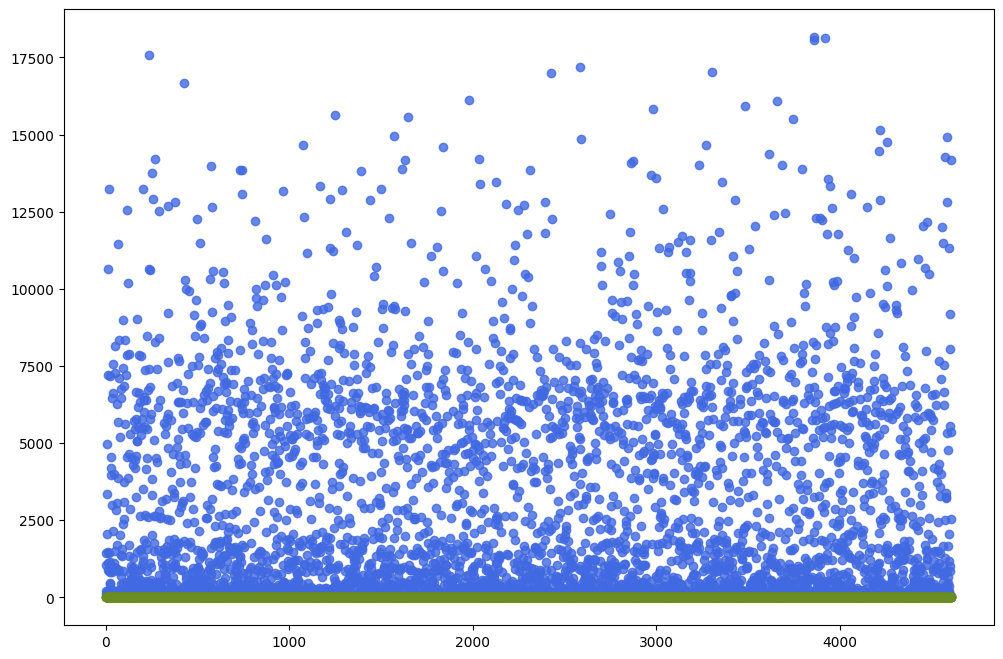

In [ ]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

#Using the Neural Network to predict the Pedestrian count for our Xtest set in order to plot it against the actual values
yhpred = h_model.predict(Xtest)


fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(xs, ytest, color ='royalblue', alpha=0.8)

plt.scatter(xs, yhpred, color ='olivedrab', alpha=0.8)

plt.show()

144/144 [==============================] - 1s 5ms/step - loss: 392.4597 - mae: 392.4597


Text(112.72222222222221, 0.5, 'MAE')

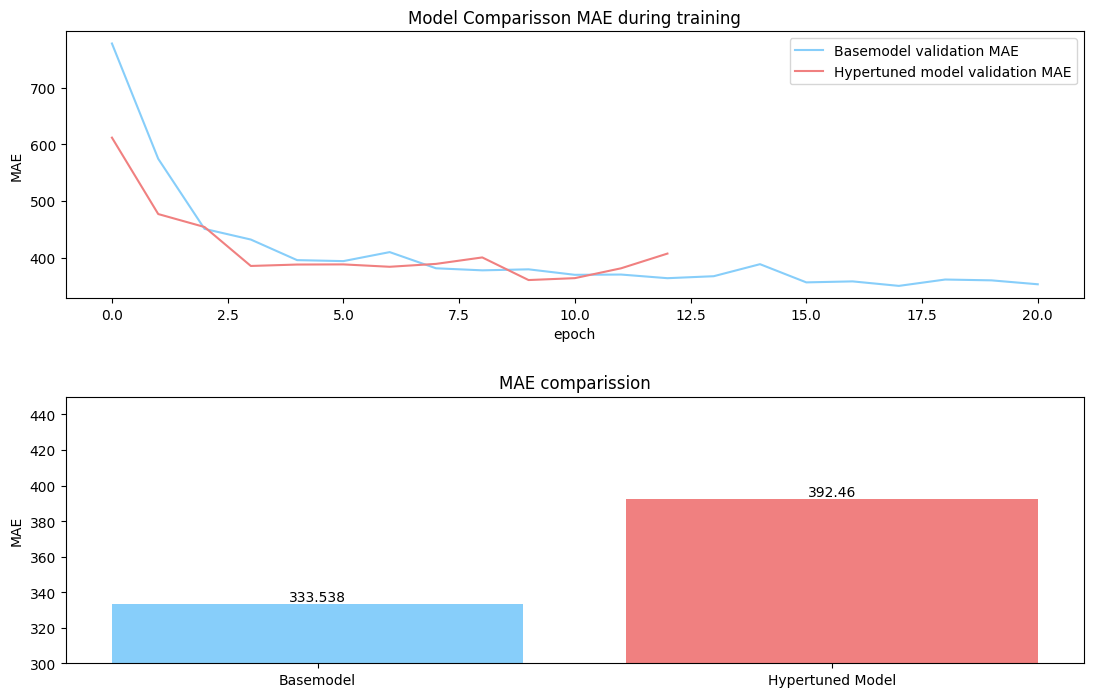

In [ ]:
#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(2, figsize=(12, 8))

fig.tight_layout(pad=5.0)

axs[0].plot(history.history['val_mae'], label="Basemodel validation MAE", color="lightskyblue")
axs[0].plot(h_history.history['val_mae'], label="Hypertuned model validation MAE", color="lightcoral")
axs[0].set_title('Model Comparisson MAE during training')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('epoch')
axs[0].legend(loc='upper right')


base_mae = model.evaluate(Xtest, ytest)
hp_mae = h_model.evaluate(Xtest, ytest)


axs[1].bar("Basemodel", base_mae[0], color="lightskyblue" )
axs[1].bar("Hypertuned Model", hp_mae[0], color="lightcoral")

axs[1].bar_label(axs[1].containers[0], label_type='edge')
axs[1].bar_label(axs[1].containers[1], label_type='edge')
axs[1].set_ylim([300, 450])
axs[1].set_title('MAE comparission')
axs[1].set_ylabel('MAE')